In [69]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [70]:
datos=pd.read_csv("Torneo_de_Hamburguesas.csv")

In [71]:
Grupo1=datos[datos["¿Qué equipo va a calificar?"]=="Grupo 1 (Alexandra, Maria Jose)"]
Grupo2=datos[datos["¿Qué equipo va a calificar?"]=="Grupo 2 (Kike, Katherine, Natalia)"]
Grupo3=datos[datos["¿Qué equipo va a calificar?"]=="Grupo 3 (Harry, Valeria)"]
Grupo4=datos[datos["¿Qué equipo va a calificar?"]=="Grupo 4 (Luismiguel, LULU)"]
Grupo5=datos[datos["¿Qué equipo va a calificar?"]=="Grupo 5 (Alejandro, Valentina)"]

In [72]:
Grupo2=Grupo2[Grupo2["¿Qué le cambiaría?, ¿Qué sugerencias tiene?"]!="Nada "]
Grupo2=Grupo2[Grupo2["¿Qué le cambiaría?, ¿Qué sugerencias tiene?"]!="Deliciosa"]
Grupo2=Grupo2[Grupo2["¿Qué le cambiaría?, ¿Qué sugerencias tiene?"]!="Espectacular"]

In [73]:
Grupo1.keys()

Index(['Marca temporal', 'Puntuación', '¿Qué equipo va a calificar?',
       '¿Cómo calificaría usted la presentación?',
       '¿Cómo calificaría usted la creatividad del producto?',
       'Término de la carne', 'Sabor General de la Hamburguesa',
       'Consistencia del Producto',
       '¿Qué le cambiaría?, ¿Qué sugerencias tiene?'],
      dtype='object')

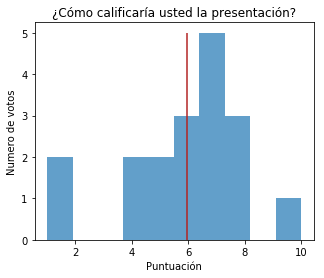

In [74]:
plt.figure(figsize=(5,4))
Grupo1["¿Cómo calificaría usted la presentación?"].plot.hist(alpha=0.7)
plt.xlabel("Puntuación")
plt.ylabel("Numero de votos")
plt.title("¿Cómo calificaría usted la presentación?")
plt.vlines(Grupo1["¿Cómo calificaría usted la presentación?"].mean(),ymin=0,ymax=5,color="firebrick")
plt.show()

In [75]:
Preguntas=["¿Cómo calificaría usted la presentación?",'Término de la carne',"¿Cómo calificaría usted la creatividad del producto?","Sabor General de la Hamburguesa","Consistencia del Producto"]
G=[Grupo1,Grupo2,Grupo3,Grupo4,Grupo5]
Colores=["tomato","firebrick","royalblue","magenta","pink"]

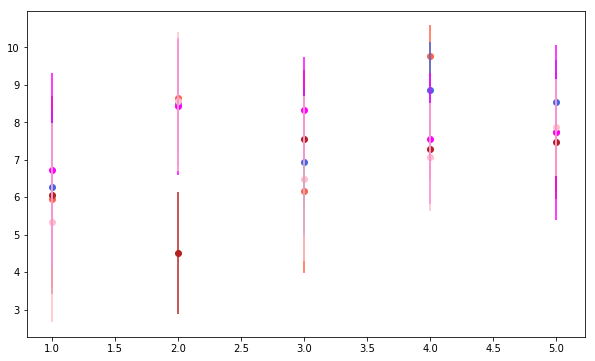

In [76]:
plt.figure(figsize=(10,6))
grp=0
for grupo in G:
    grp+=1
    num=0
    for q in Preguntas:
        plt.errorbar(grp,grupo[q].mean(),yerr=grupo[q].std(),color=Colores[num])
        plt.scatter(grp,grupo[q].mean(),color=Colores[num])
        num+=1
plt.show()

In [77]:
grp=0
index=0
Colors=["tomato","firebrick","royalblue","magenta","pink"]
AVG=[]
for grupo in G:
    grp+=1
    k=1
    plt.figure(figsize=(10,8))
    plt.subplots_adjust(wspace = 0.2,hspace = 0.5)
    promedio=0
    for q in Preguntas:
        plt.subplot(3,2,k)
        plt.hist(grupo[q],color=Colors[index],density=True)
        histo,bins=np.histogram(grupo[q],density=True)
        plt.vlines(grupo[q].mean(),ymin=0,ymax=histo.max())
        plt.title(q)
        promedio+=grupo[q].mean()
        k+=1
    AVG.append(promedio/len(Preguntas))
    index+=1
    plt.savefig(grupo["¿Qué equipo va a calificar?"].iloc[0]+".pdf")
    #plt.savefig("Grupo"+str(index)+".pdf")
    plt.close()

In [80]:
k=0
for i in G:
    print("El puntaje del ",i["¿Qué equipo va a calificar?"].iloc[0],"fue de ",AVG[k])
    k+=1

El puntaje del  Grupo 1 (Alexandra, Maria Jose) fue de  6.066666666666666
El puntaje del  Grupo 2 (Kike, Katherine, Natalia) fue de  7.739130434782609
El puntaje del  Grupo 3 (Harry, Valeria) fue de  7.1
El puntaje del  Grupo 4 (Luismiguel, LULU) fue de  8.114285714285714
El puntaje del  Grupo 5 (Alejandro, Valentina) fue de  7.866666666666667


18